In [1]:
data = read.csv(file = "bodyfat.csv")

In [2]:
data$EBF = 495/data$DENSITY - 450
data[abs(data$EBF-data$BODYFAT)>3,]
## Check the bodyfat defined by density and the raw bodyfat. Drop if the difference is too big

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,EBF
48,48,6.4,1.0665,39,148.50,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9,14.1350211
76,76,18.3,1.0666,61,148.25,67.50,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3,14.0915057
96,96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4,0.3684833
182,182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5,-3.6116873


In [3]:
data[data$EBF<3,]
## Check the bodyfat defined by density. Drop if too low

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,EBF
96,96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4,0.3684833
172,172,1.9,1.0983,35,125.75,65.50,20.6,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9,0.6965310
182,182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5,-3.6116873


In [4]:
BMI = function(data, weight, height){
    heights = data[, height] * 2.54 / 100
    weights = data[, weight] * 0.454 
    BMI = weights / heights^2
    BMI
}

In [5]:
data$bmi_c = BMI(data, 5, 6)
data[abs(data$bmi_c - data$ADIPOSITY)>2,]
## Check the BMI computed by WEIGHT and HEIGHT. Drop if the diffrence is too big 

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,EBF,bmi_c
42,42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4,32.92683,165.76707
163,163,13.3,1.0690,33,184.25,68.75,24.4,40.7,98.9,92.1,103.5,64.0,37.3,23.5,33.5,30.6,19.7,13.04958,27.43156
221,221,12.7,1.0706,54,153.25,70.50,24.5,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9,12.35756,21.69755


In [6]:
data[42,"HEIGHT"] = 69.43
## Correct the HEIGHT of NO.42 obersvation

In [7]:
outliers= c(48, 76, 96, 163, 172, 182, 221) 
##Get the union of the outliers

In [8]:
fat = data[!(data$IDNO %in% outliers), ]

In [9]:
fat$h_1 = 1/(fat$HEIGHT)
fat$dh_1 = 1/(fat$ABDOMEN * fat$HEIGHT)
fat$d_h1 = fat$ABDOMEN / fat$HEIGHT 


Call:
lm(formula = BODYFAT ~ dh_1 + d_h1 + h_1, data = fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.1597  -3.1242   0.1473   2.6508   9.9503 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.511e+01  7.349e+00  -3.417 0.000742 ***
dh_1        -3.548e+05  8.850e+04  -4.009 8.15e-05 ***
d_h1         2.899e+00  9.917e+00   0.292 0.770286    
h_1          6.717e+03  2.019e+03   3.327 0.001014 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.092 on 241 degrees of freedom
Multiple R-squared:  0.7154,	Adjusted R-squared:  0.7119 
F-statistic:   202 on 3 and 241 DF,  p-value: < 2.2e-16


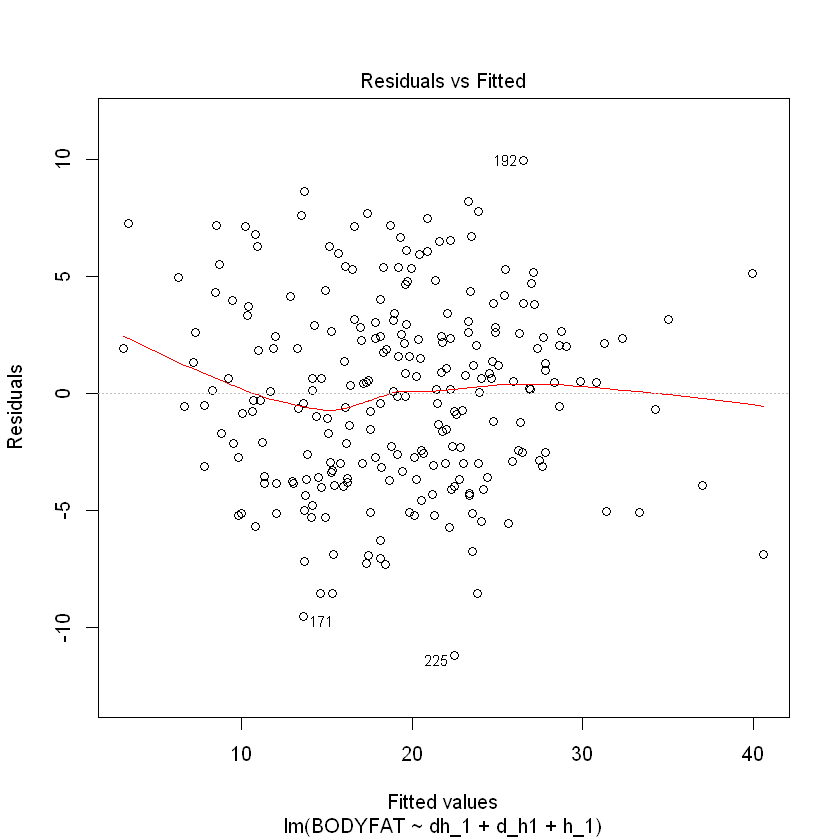

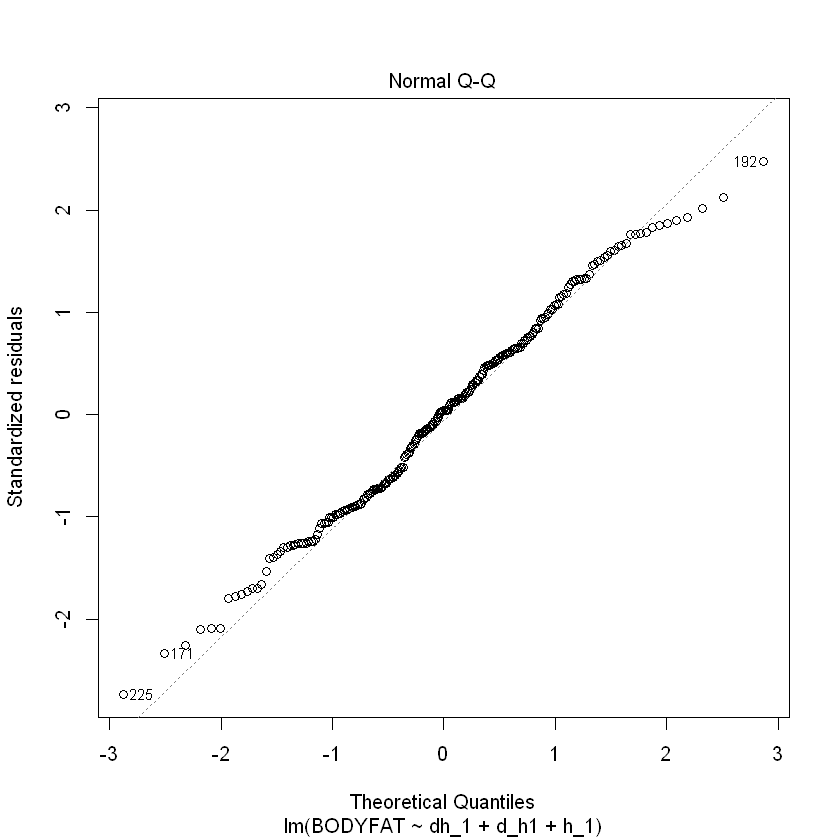

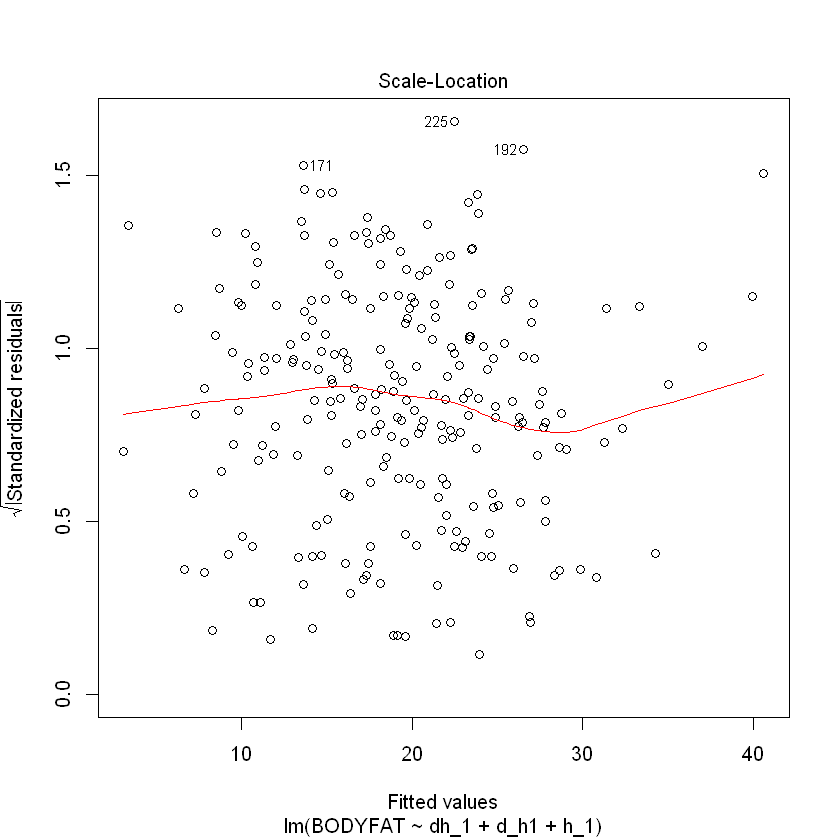

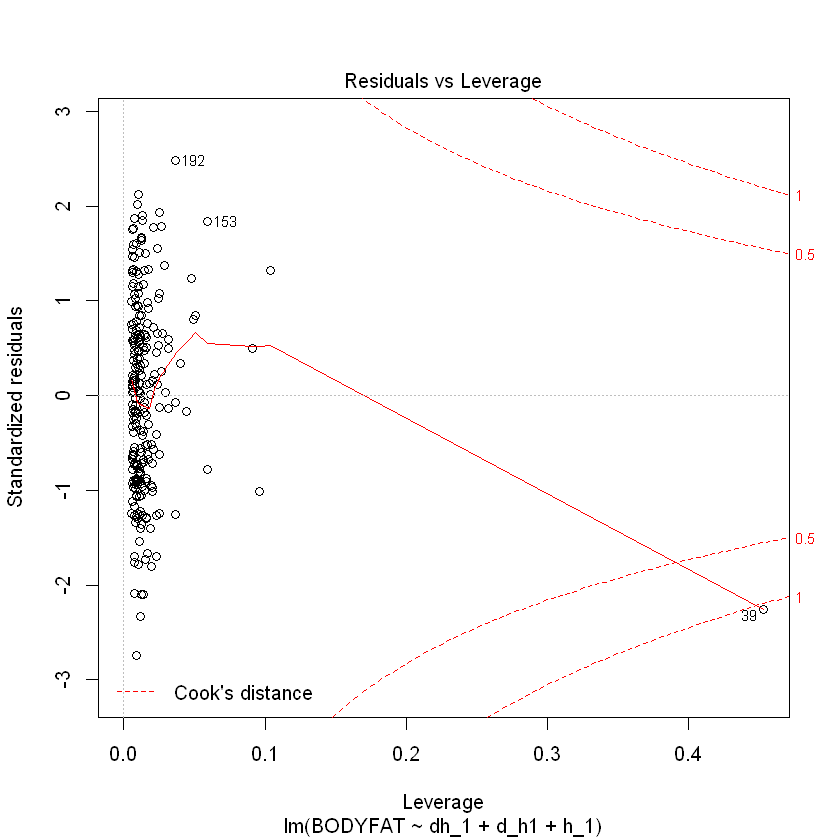

In [10]:
lm.full = lm(BODYFAT ~ dh_1 + d_h1 + h_1, fat)
summary(lm.full)
plot(lm.full)

In [11]:
step(lm.full, k = 2)

Start:  AIC=694.43
BODYFAT ~ dh_1 + d_h1 + h_1

       Df Sum of Sq    RSS    AIC
- d_h1  1     1.431 4037.4 692.52
<none>              4036.0 694.43
- h_1   1   185.400 4221.4 703.43
- dh_1  1   269.095 4305.1 708.24

Step:  AIC=692.52
BODYFAT ~ dh_1 + h_1

       Df Sum of Sq     RSS    AIC
<none>               4037.4 692.52
- h_1   1    2747.4  6784.8 817.69
- dh_1  1   10110.7 14148.1 997.74



Call:
lm(formula = BODYFAT ~ dh_1 + h_1, data = fat)

Coefficients:
(Intercept)         dh_1          h_1  
     -25.39   -380228.06      7283.25  



Call:
lm(formula = BODYFAT ~ dh_1 + d_h1, data = fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9297  -3.1697   0.0541   2.8022   9.0907 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -15.594      6.909  -2.257  0.02488 *  
dh_1        -69759.265  22719.293  -3.070  0.00238 ** 
d_h1            34.561      2.851  12.122  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.177 on 242 degrees of freedom
Multiple R-squared:  0.7024,	Adjusted R-squared:  0.6999 
F-statistic: 285.5 on 2 and 242 DF,  p-value: < 2.2e-16


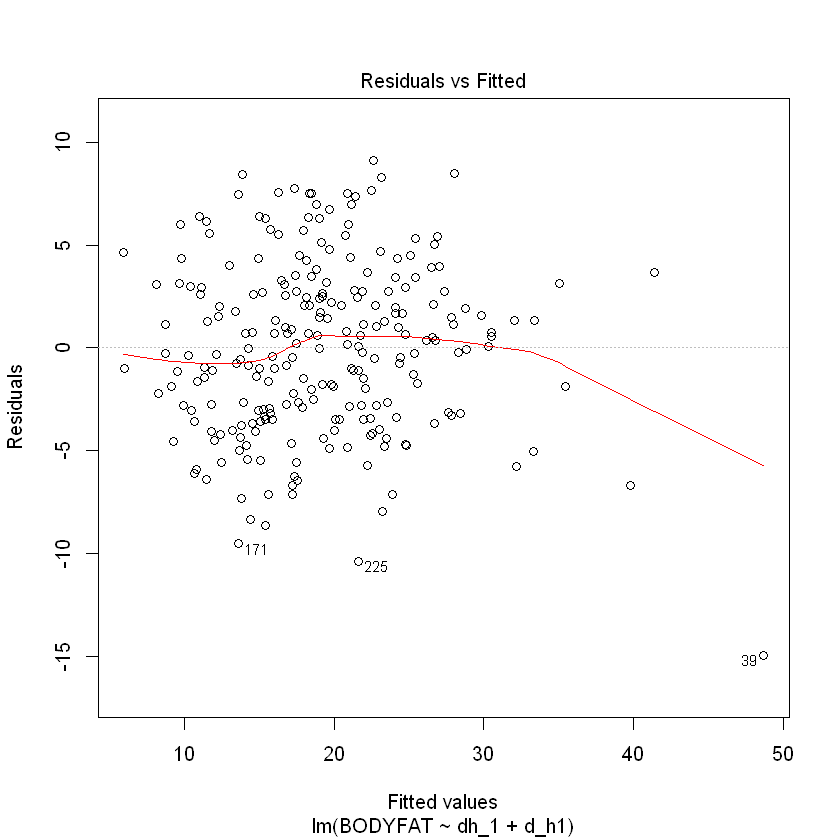

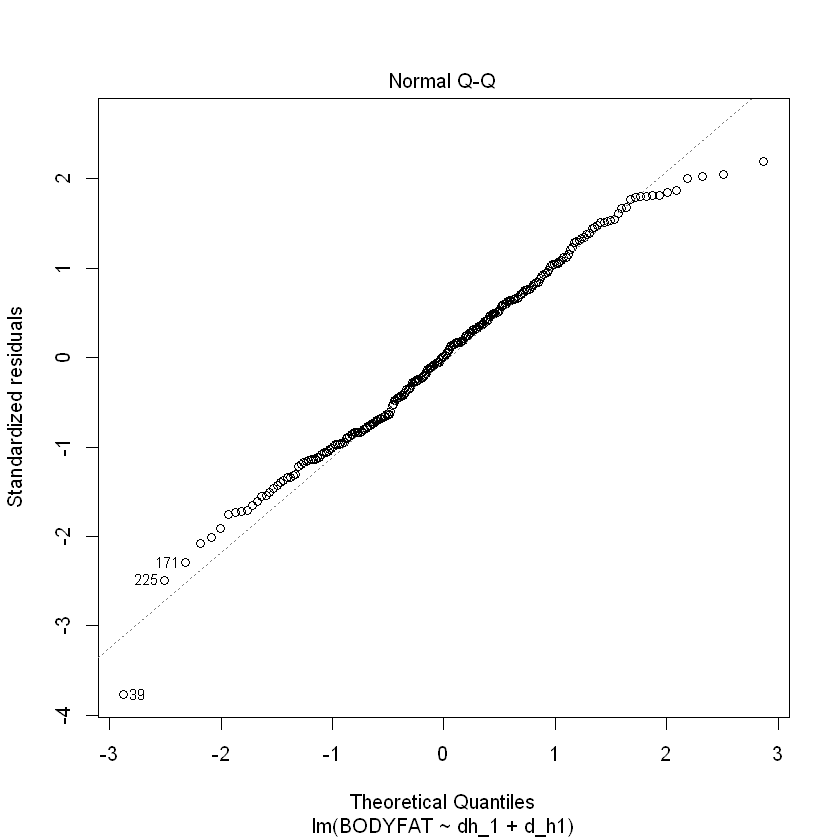

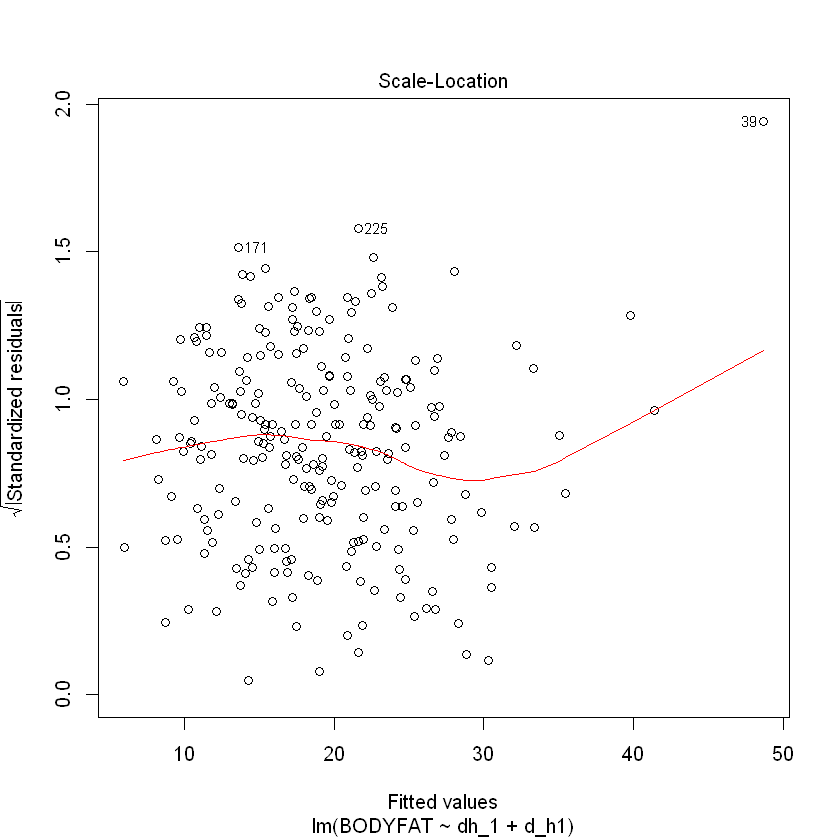

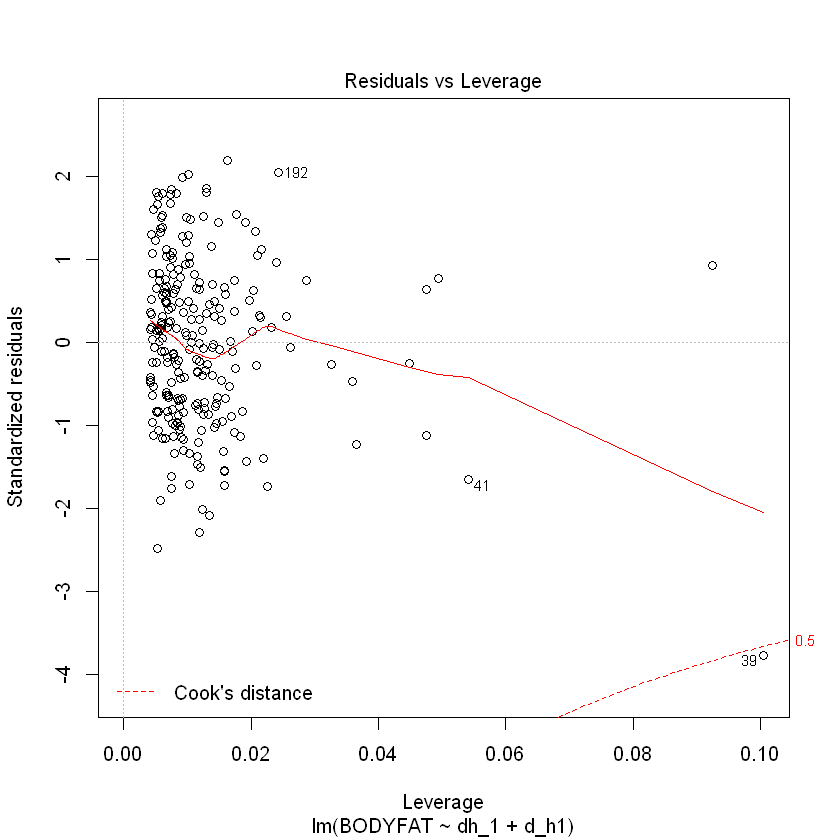

In [12]:
lm.final = lm(BODYFAT ~ dh_1 + d_h1, fat)
summary(lm.final)
plot(lm.final)

In [13]:
fat_new = fat[!(fat$IDNO %in% c(39)), ] # leverage too big


Call:
lm(formula = BODYFAT ~ dh_1 + d_h1, data = fat_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5914  -3.1267   0.0095   2.7289   8.7151 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -19.767      6.802  -2.906  0.00400 ** 
dh_1        -64749.708  22125.801  -2.926  0.00376 ** 
d_h1            37.182      2.853  13.032  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.061 on 241 degrees of freedom
Multiple R-squared:  0.7155,	Adjusted R-squared:  0.7132 
F-statistic: 303.1 on 2 and 241 DF,  p-value: < 2.2e-16


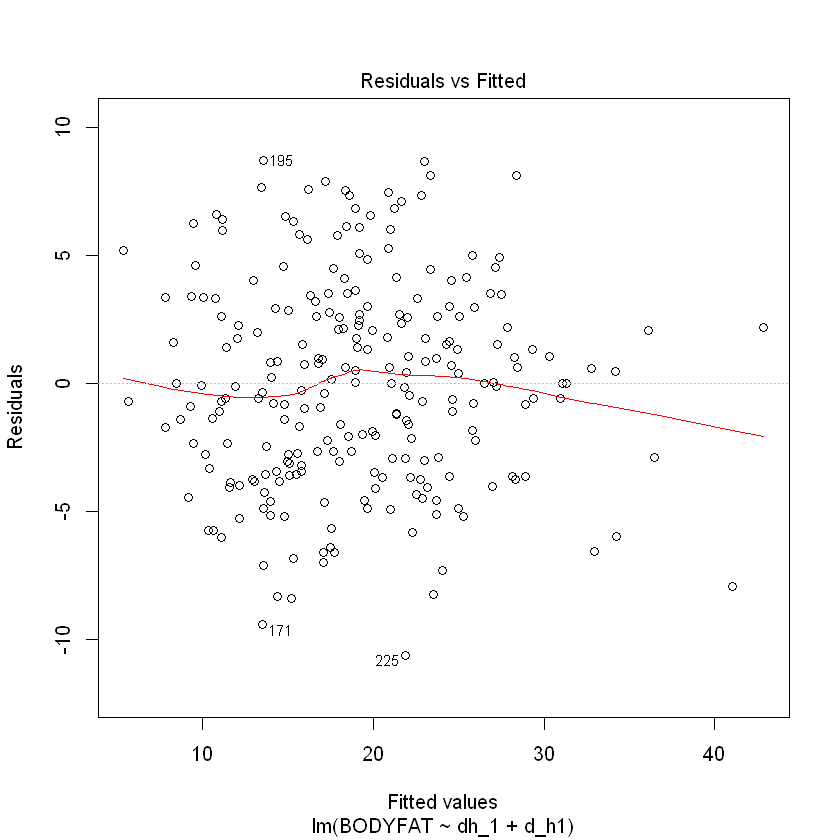

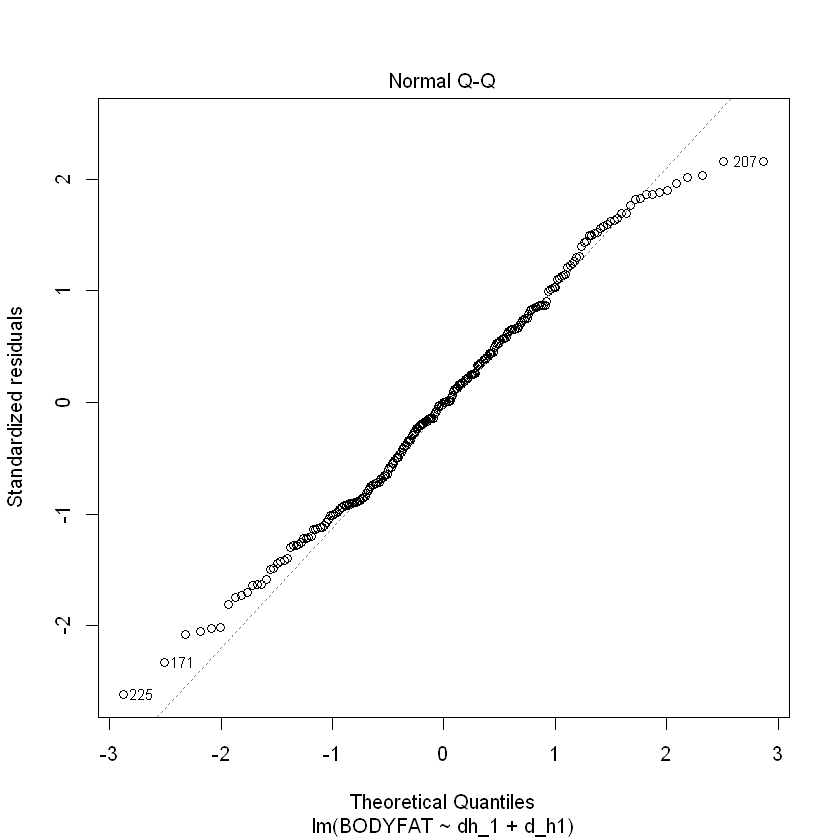

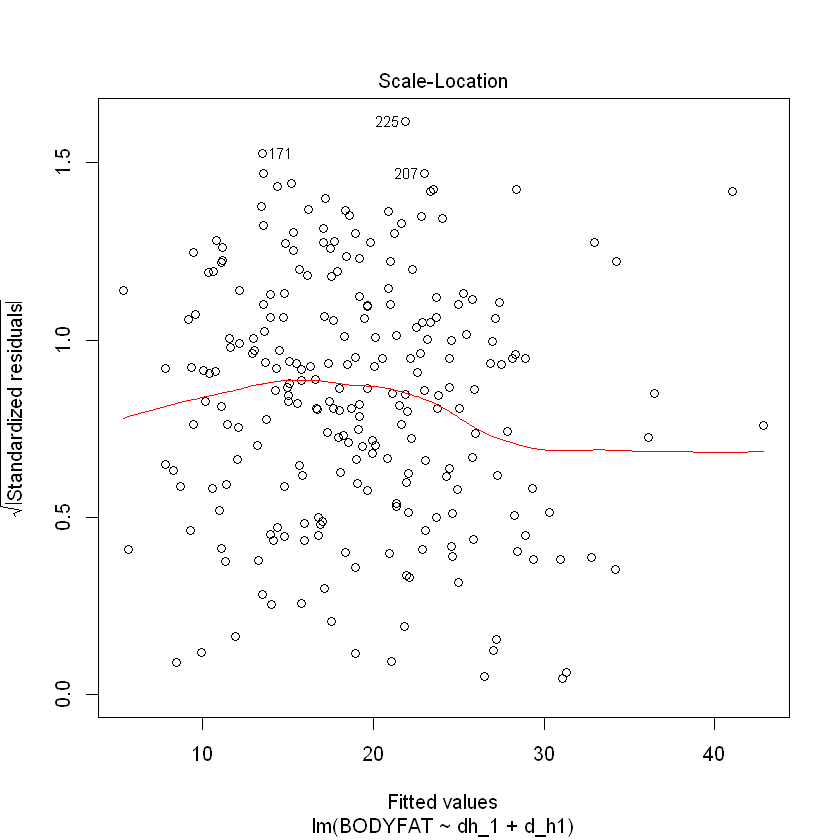

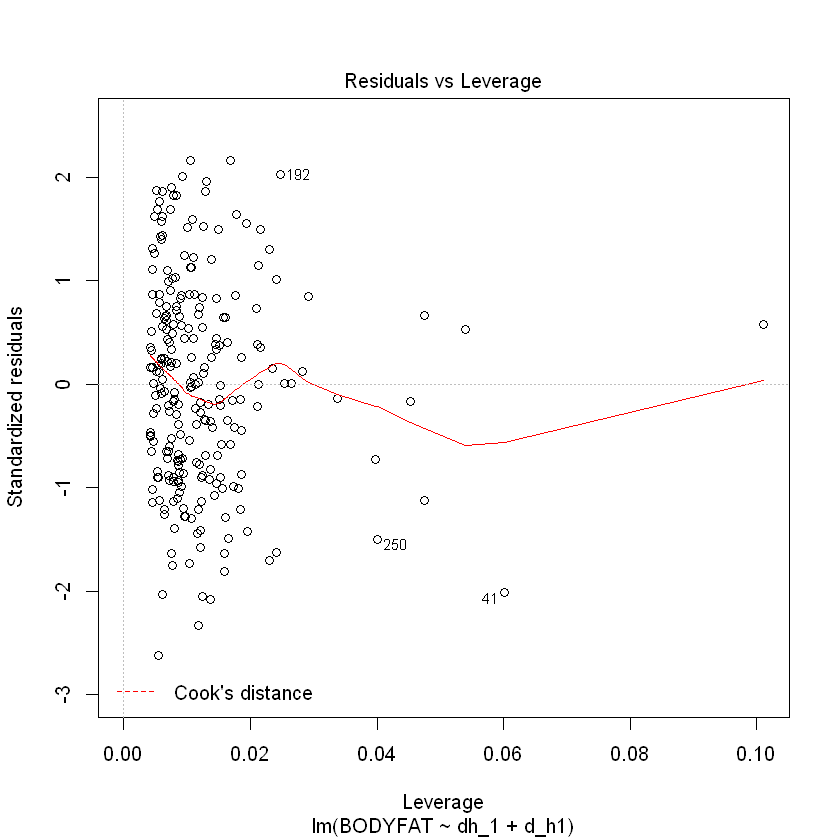

In [14]:
lm.final = lm(BODYFAT ~ dh_1 + d_h1, fat_new)
summary(lm.final)
plot(lm.final)